In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('Customer Churn.csv')

In [6]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks with 0 as tenure is o and no total charges are recoreded

In [12]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
df.isnull().sum().sum()

0

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
df["customerID"].duplicated().sum()

0

In [22]:
def conv(value):
    if value ==1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

#converted 0 and 1 values of senior citizens to yes/no to make it easier to understand 

In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


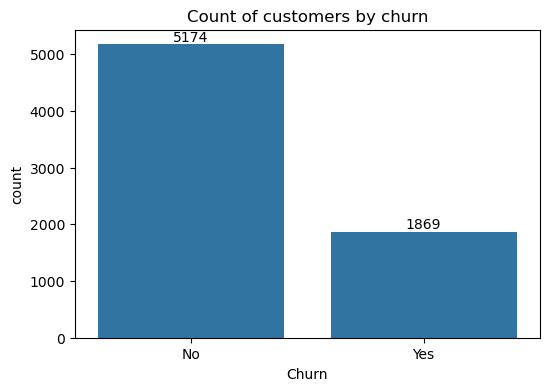

In [26]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Churn',data=df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()

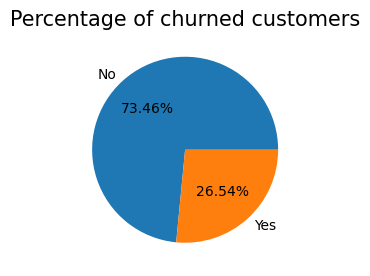

In [28]:
plt.figure(figsize=(3,4))
gb=df.groupby("Churn").agg({"Churn":"count"})
plt.title("Percentage of churned customers",fontsize=15)
plt.pie(gb['Churn'],labels=gb.index, autopct="%1.2f%%")
plt.show()

#from giives pie chrt we can conclude that 26.54% of our customers have churned out. #not let's  explore the reason behind it. 

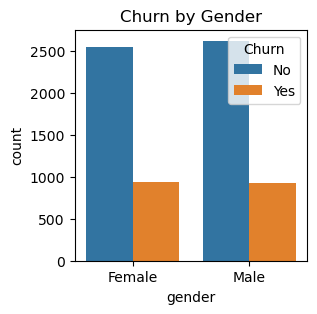

In [30]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

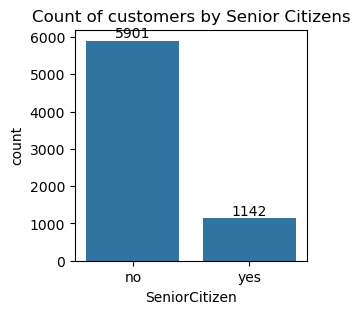

In [40]:
plt.figure(figsize=(3,3))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Senior Citizens")
plt.show()

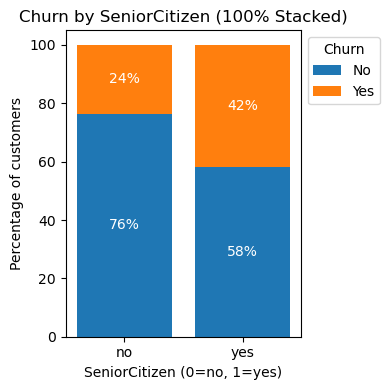

In [78]:
counts = df.groupby(['SeniorCitizen','Churn']).size().reset_index(name='count')
counts['pct'] = counts['count'] / counts.groupby('SeniorCitizen')['count'].transform('sum') * 100
pct_df = counts.pivot(index='SeniorCitizen', columns='Churn', values='pct').fillna(0)

fig, ax = plt.subplots(figsize=(4,4))
bottom = np.zeros(len(pct_df))
for status in pct_df.columns:
    ax.bar(pct_df.index.astype(str), pct_df[status], bottom=bottom, label=status)
    bottom += pct_df[status].values

for i, cat in enumerate(pct_df.index):
    cum = 0
    for status in pct_df.columns:
        val = pct_df.loc[cat, status]
        if val > 0:
            ax.text(i, cum + val/2, f"{val:.0f}%", ha='center', va='center', color='white', fontsize=10)
            cum += val

ax.set_xlabel('SeniorCitizen (0=no, 1=yes)')
ax.set_ylabel('Percentage of customers')
ax.set_title('Churn by SeniorCitizen (100% Stacked)')
ax.legend(title='Churn',bbox_to_anchor=(1.0,1.0))
plt.tight_layout()
plt.show()


#Compartive a greated percentage of people in seniorcitizens category have churned

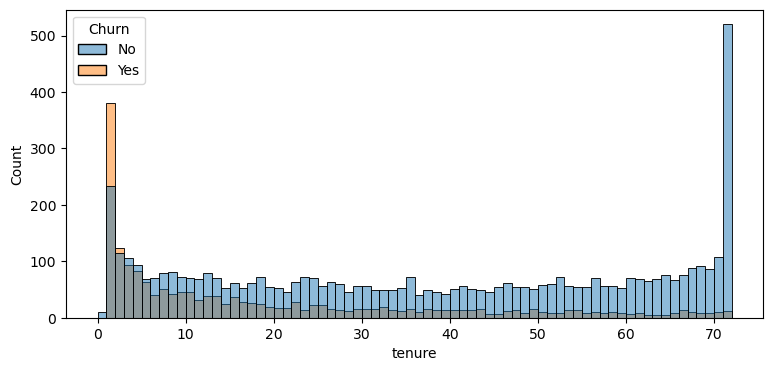

In [90]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

#people who have used our services for a long time have stayed and people who have used our services for 1 month or 2 months have churned

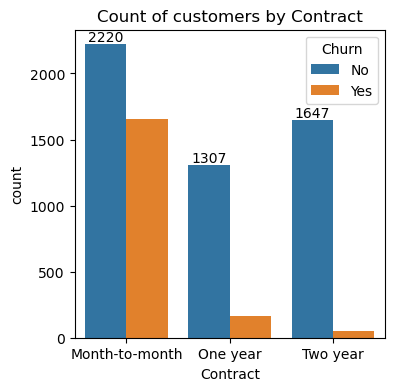

In [104]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract")
plt.show()

#people who have month contract are likely to churn them fromm those who have 1 or 2 years or contract

In [106]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

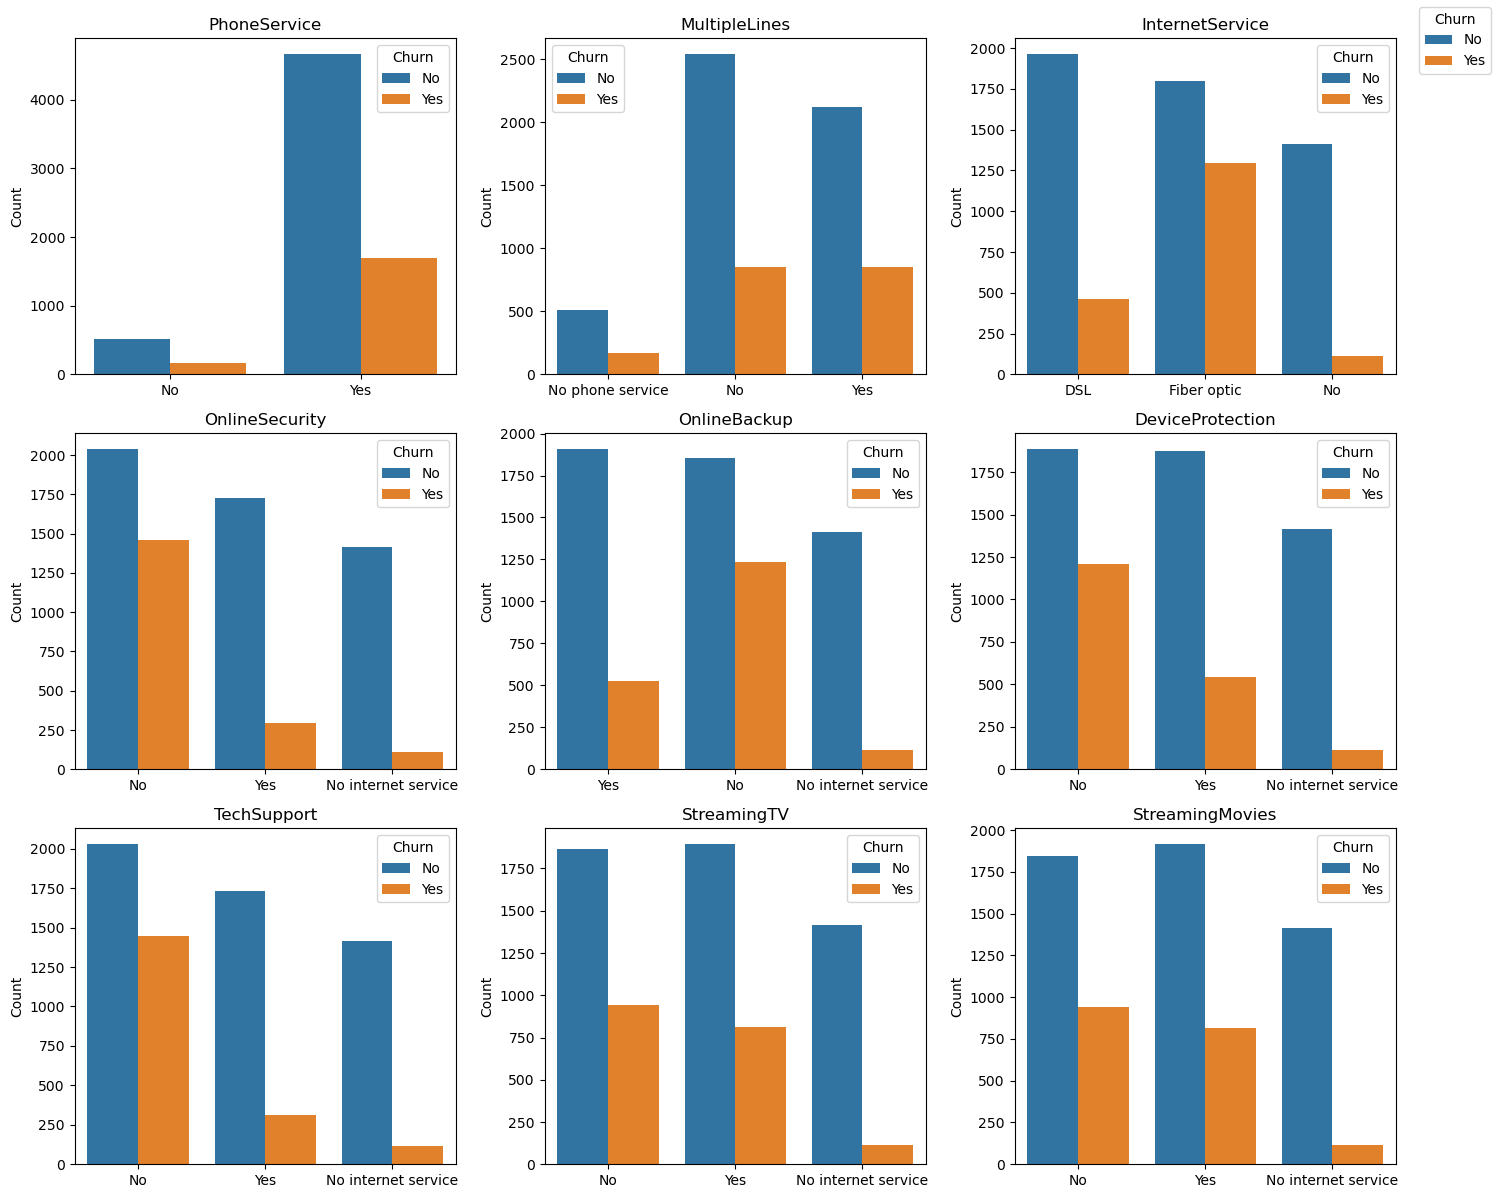

In [108]:
# List of categorical columns you want to plot
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# 1) Set up the figure and axes: 3 rows × 3 cols
fig, axs = plt.subplots(3, 3, figsize=(15, 12), sharey=False)

# 2) Loop through columns and axes using zip
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(data=df, x=col, hue='Churn', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# 3) Remove any unused axes (in case your grid is larger)
for extra_ax in axs.flatten()[len(cols):]:
    extra_ax.remove()

# 4) Add a global legend
handles, labels = axs.flatten()[0].get_legend_handles_labels()
fig.legend(handles, labels, title='Churn', loc='upper right')

plt.tight_layout(rect=[0, 0, 0.95, 1])  # leave space for legend
plt.show()


#Most customers have PhoneService, InternetService (mostly DSL or Fiber), and many also subscribe 
to additional services like OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies.

#Churn rates are higher among users with InternetService, particularly Fiber optic subscribers, compared to those with no internet.

#Among the add-on services, users without OnlineSecurity, OnlineBackup, or TechSupport show higher churn, suggesting these features help retain customers.

#Subscriptions to StreamingTV/Movies and DeviceProtection also correlate with lower churn, indicating bundled entertainment and protection services may enhance loyalty.



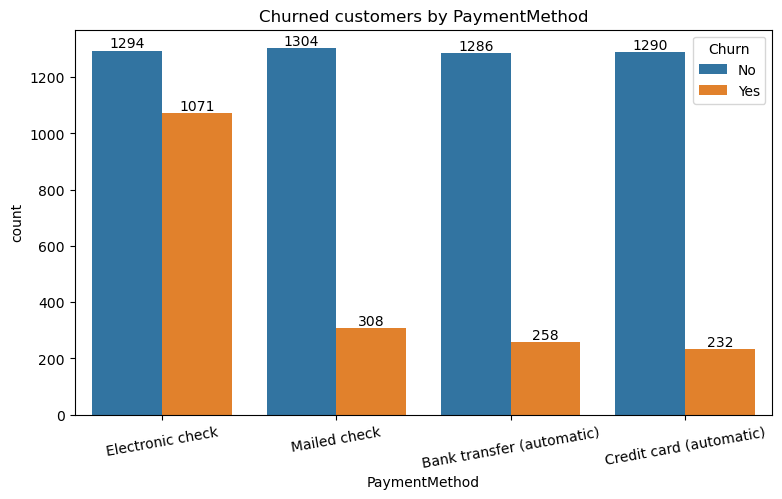

In [122]:
plt.figure(figsize=(9,5))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customers by PaymentMethod")
plt.xticks(rotation=10)
plt.show()

#cutomers is likely to churn when he is using electronic check as a payments methods.